<a href="https://colab.research.google.com/github/milkakeza/LR/blob/main/LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

#Download latest version
path = kagglehub.dataset_download("rahulvyasm/medical-insurance-cost-prediction")
print("Path to dataset files:", path)

100%|██████████| 31.6k/31.6k [00:00<00:00, 34.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/rahulvyasm/medical-insurance-cost-prediction/versions/1


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
data_dir = os.path.join('/root/.cache/kagglehub/datasets/rahulvyasm/medical-insurance-cost-prediction/versions/1')
os.listdir(data_dir)

['medical_insurance.csv']

In [ ]:
df = pd.read_csv(os.path.join(data_dir, 'medical_insurance.csv'))
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.duplicated().sum()

np.int64(1435)

In [ ]:
not_smoker = df[df['smoker'] == 'no'].value_counts().sum()/len(df)*100
print(not_smoker)
smoker = df[df['smoker'] == 'yes'].value_counts().sum()/len(df)*100
print(smoker)

79.65367965367966
20.346320346320347


In [ ]:
df['sex'] = df['sex'].map({'female': 0, 'male': 1})

In [ ]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
5,31,0,25.740,0,no,southeast,3756.62160
6,46,0,33.440,1,no,southeast,8240.58960
7,37,0,27.740,3,no,northwest,7281.50560
8,37,1,29.830,2,no,northeast,6406.41070
9,60,0,25.840,0,no,northwest,28923.13692


In [ ]:
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

In [ ]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
5,31,0,25.740,0,0,southeast,3756.62160
6,46,0,33.440,1,0,southeast,8240.58960
7,37,0,27.740,3,0,northwest,7281.50560
8,37,1,29.830,2,0,northeast,6406.41070
9,60,0,25.840,0,0,northwest,28923.13692


In [ ]:
unique_columns = df['region'].unique()
print(unique_columns)

['southwest' 'southeast' 'northwest' 'northeast']


In [ ]:
encoder = OneHotEncoder(sparse_output=False)
encoded_columns = encoder.fit_transform(df[['region']])
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['region']))
df = pd.concat([df, encoded_df], axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,southwest,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,southeast,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,southeast,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,northwest,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,northwest,3866.85520,0.0,1.0,0.0,0.0


In [ ]:
df.drop(columns=['region'], inplace=True)
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0


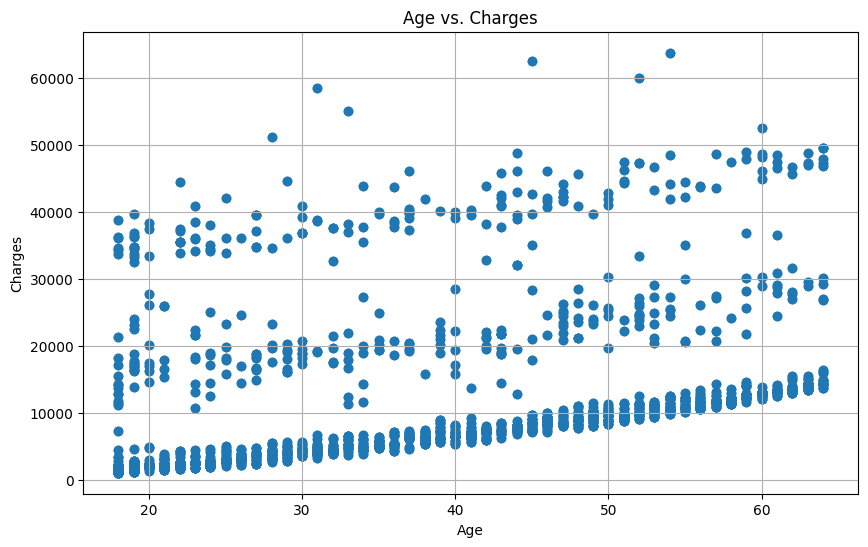

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['charges'], marker='o', linestyle='-')
plt.title('Age vs. Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.grid(True)

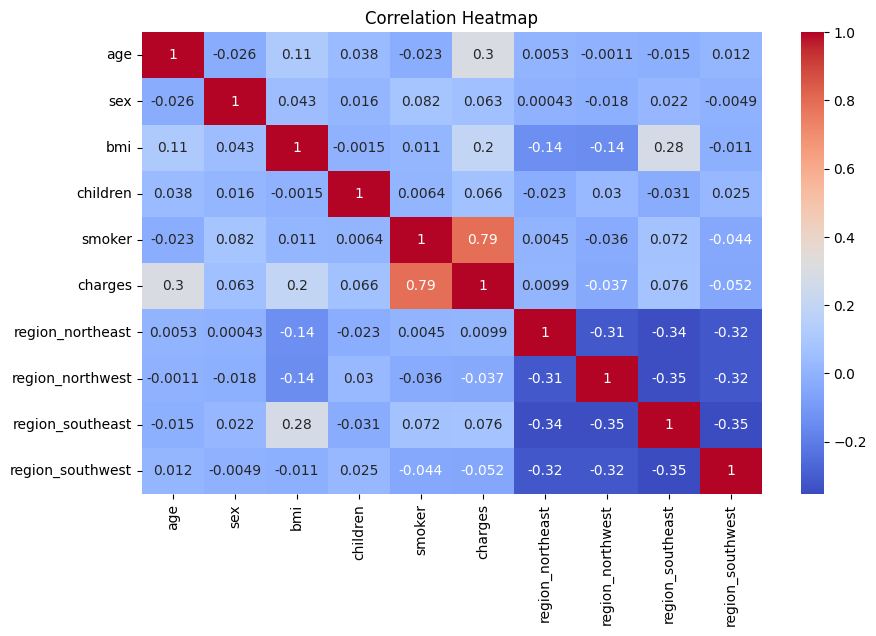

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='smoker', ylabel='charges'>

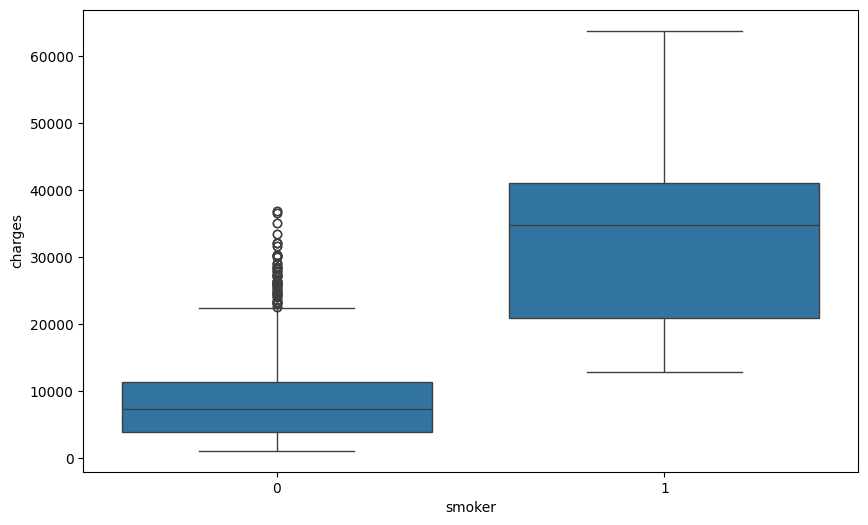

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['smoker'], y=df['charges'], data=df)

In [ ]:
df.drop(columns=['children', 'sex'], inplace=True)
df.head()

,age,bmi,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,1,16884.92400,0.0,0.0,0.0,1.0
1,18,33.770,0,1725.55230,0.0,0.0,1.0,0.0
2,28,33.000,0,4449.46200,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,0.0,0.0


In [ ]:
X = df.drop(columns=['charges'])
y = df['charges']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['smoker'])

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = LR.predict(X_test)

In [ ]:
y_pred = LR.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 39208848.77576339
Mean Absolute Error: 4427.195916489619
R-squared: 0.7239114934479245


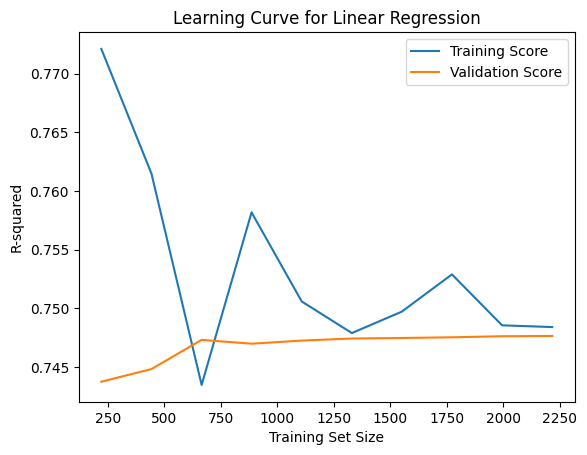

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    LinearRegression(), X, y, cv=5, scoring='r2', n_jobs=1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('R-squared')
plt.title('Learning Curve for Linear Regression')
plt.legend()
plt.show()

In [ ]:
RandomF = RandomForestRegressor()
RandomF.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = RandomF.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 8741745.349025095
Mean Absolute Error: 1438.9135332518774
R-squared: 0.9384451343656187


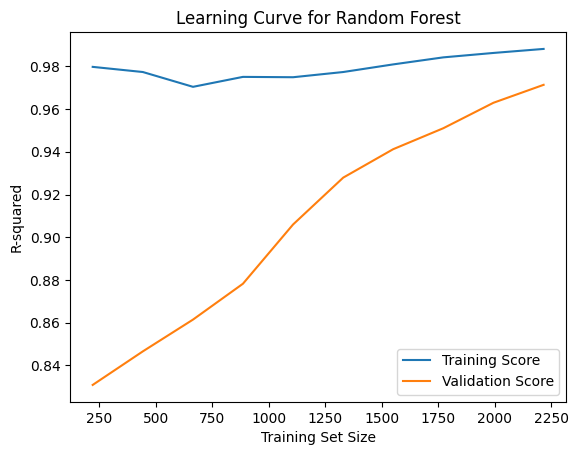

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    RandomForestRegressor(n_estimators=100), X, y, cv=5, scoring='r2', n_jobs=1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('R-squared')
plt.title('Learning Curve for Random Forest')
plt.legend()
plt.show()

In [ ]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = decision_tree.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 8513306.360620387
Mean Absolute Error: 728.7291479087088
R-squared: 0.9400536839944951


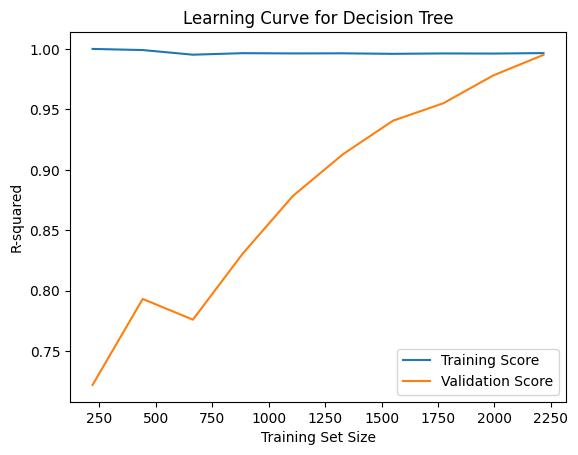

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    DecisionTreeRegressor(), X, y, cv=5, scoring='r2', n_jobs=1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('R-squared')
plt.title('Learning Curve for Decision Tree')
plt.legend()
plt.show()

In [ ]:
import pickle

In [ ]:
pipeline = {
    'model': decision_tree,
    'scaler': scaler,
    'encoder': encoder,
    'feature_columns': X.columns.tolist()
}

with open('model.pkl', 'wb') as file:
    pickle.dump(pipeline, file)